# 3803ICT Big Data Assignment - Code

## PART 1 DATA PREPERATION AND PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import compress_pickle as pickle
from math import pi
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#Get high level view of the data
baseDataFrame = pd.read_csv('data/data.csv', low_memory=False)
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")
baseDataFrame.head(10)

The Dataset consists of:  318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [3]:
#Get data types
baseDataFrame.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [4]:
#Fix the date data type since it is in wrong format
baseDataFrame["Date"] = baseDataFrame["Date"].replace(to_replace=r'T.*', value='', regex=True)
baseDataFrame["Date"] = pd.to_datetime(baseDataFrame["Date"])
baseDataFrame.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [5]:
#Fix full description data type
# Clear HTML tags from Full Description if they're present
# Only uncomment when required - this code takes a significant amount of time to process.
# from bs4 import BeautifulSoup
# for row in range(0, len(baseDataFrame["FullDescription"])):
#     soup = BeautifulSoup(baseDataFrame["FullDescription"][row])
#     baseDataFrame["FullDescription"][row] = soup.get_text()
# baseDataFrame.head(200)

In [6]:
#Remove duplicates in data
baseDataFrame = baseDataFrame.drop_duplicates(subset=['Company', 'Title', 'Location', 'Area', 'Classification', 'SubClassification',
                                                     'Requirement', 'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType'])
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")

The Dataset consists of:  303146  rows and  13  columuns


In [7]:
# Cull any data past the 8 digit ID and change type to ID
baseDataFrame['Id'] = baseDataFrame['Id'].apply(lambda x: x[:8])
baseDataFrame = baseDataFrame.astype({"Id": int})
baseDataFrame.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [8]:
print(baseDataFrame.isna().sum())

Id                        0
Title                     0
Company               11850
Date                      0
Location             111051
Area                 183994
Classification       111051
SubClassification    111051
Requirement               7
FullDescription       15408
LowestSalary              0
HighestSalary             0
JobType               15336
dtype: int64


In [9]:
#Recatorgise missing data
baseDataFrame['Company'].fillna('None', inplace=True)
baseDataFrame['Location'].fillna('None', inplace=True)
baseDataFrame['Area'].fillna('None', inplace=True)
baseDataFrame['Classification'].fillna('None', inplace=True)
baseDataFrame['Requirement'].fillna('None', inplace=True)
baseDataFrame['FullDescription'].fillna('None', inplace=True)
baseDataFrame['JobType'].fillna('None', inplace=True)

In [10]:
#Determine range of every column
# Print the domains of all non-freeform fields
# Free-form fields are Requirement and FullDescription, where each entry is expected to be unique so the domain is limitless.
print(f"ID: [{min(baseDataFrame['Id'])}, {max(baseDataFrame['Id'])}] (mathematical domain)")
print(f"Title: {baseDataFrame.Title.unique()}")
print(f"Date: {min(baseDataFrame['Date'])} to {max(baseDataFrame['Date'])} (date range)")
print(f"Location: {baseDataFrame.Location.unique()}")
print(f"Area: {baseDataFrame.Area.unique()}")
print(f"Classification: {baseDataFrame.Classification.unique()}")
print(f"Sub-Classification: {baseDataFrame.SubClassification.unique()}")
print(f"Job Type: {baseDataFrame.JobType.unique()}")
print(f"Lowest Salary: [{min(baseDataFrame['LowestSalary'])}, {max(baseDataFrame['LowestSalary'])}] (mathematical domain)")
print(f"Highest Salary: [{min(baseDataFrame['HighestSalary'])}, {max(baseDataFrame['HighestSalary'])}] (mathematical domain)")
print(f"Average Salary: [{min(baseDataFrame['AverageSalary'])}, {max(baseDataFrame['AverageSalary'])}] (mathematical domain)")
print(f"Salary Range: [{min(baseDataFrame['SalaryRange'])}, {max(baseDataFrame['SalaryRange'])}] (mathematical domain)")

ID: [31671087, 38566133] (mathematical domain)
Title: ['Casual Stock Replenisher'
 'RETAIL SALES SUPERSTARS and STYLISTS Wanted - Womens Fashion - SUNSHINE PLAZA'
 'Team member - Belrose' ... 'Web Content Writer - June 2019 contract'
 'Brand Director - Global Premium Brand' 'Head of Operations - EOI']
Date: 2018-10-01 00:00:00 to 2019-03-13 00:00:00 (date range)
Location: ['Sydney' 'Richmond & Hawkesbury' 'Brisbane' 'Gosford & Central Coast'
 'Adelaide' 'Melbourne' 'Perth' 'Mackay & Coalfields' 'Sunshine Coast'
 'Gold Coast' 'West Gippsland & Latrobe Valley'
 'Hervey Bay & Fraser Coast' 'South West Coast VIC'
 'Mornington Peninsula & Bass Coast' 'Port Hedland, Karratha & Pilbara'
 'Ballarat & Central Highlands' 'Bendigo, Goldfields & Macedon Ranges'
 'Yarra Valley & High Country' 'Coffs Harbour & North Coast'
 'Newcastle, Maitland & Hunter' 'Tumut, Snowy & Monaro' 'Darwin'
 'Toowoomba & Darling Downs' 'ACT' 'Wollongong, Illawarra & South Coast'
 'Port Macquarie & Mid North Coast' 'Sout

KeyError: 'AverageSalary'

In [11]:
for i in baseDataFrame:
    print(i)
    print(len(baseDataFrame[i].unique()))

Id
289575
Title
168065
Company
40629
Date
163
Location
66
Area
20
Classification
31
SubClassification
339
Requirement
234288
FullDescription
250902
LowestSalary
11
HighestSalary
11
JobType
5


In [12]:
#Set any of lowest salary that equals 0 to nan
#baseDataFrame['LowestSalary'] = baseDataFrame['LowestSalary'].replace([0],'NaN')
#baseDataFrame.head(10)

In [13]:
#Remove all rows that contain null data (65.2% of the data contains null values)
#baseDataFrame = baseDataFrame.dropna()

In [14]:
#print(baseDataFrame.isna().sum())

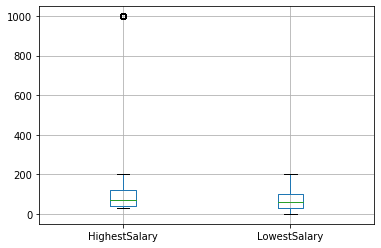

In [15]:
#Analysis range of salary
#salaryDataFrame = baseDataFrame.dropna(subset=['LowestSalary'])
#pd.to_numeric(salaryDataFrame['LowestSalary'])
#Show outliers
boxplot = baseDataFrame.boxplot(column=['HighestSalary', 'LowestSalary'])
#Remove outliers in wages
from scipy import stats
baseDataFrame = baseDataFrame[(np.abs(stats.zscore(baseDataFrame['HighestSalary'])) < 3)]
baseDataFrame = baseDataFrame[(np.abs(stats.zscore(baseDataFrame['LowestSalary'])) < 3)]

In [16]:
# Include average salary for use in analysis
baseDataFrame = baseDataFrame.assign(AverageSalary= (baseDataFrame["LowestSalary"] + baseDataFrame["HighestSalary"])/2 )

# Include salaray range for use in analysis
baseDataFrame = baseDataFrame.assign(SalaryRange= (baseDataFrame["HighestSalary"] - baseDataFrame["LowestSalary"]) )

baseDataFrame.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,None,0,30,None,15.0,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,None,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,None,0,30,None,15.0,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,None,0,30,None,15.0,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,None,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,None,0,30,None,15.0,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",None,0,30,None,15.0,30
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",None,0,30,None,15.0,30
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,None,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,None,0,30,None,15.0,30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,None,0,30,None,15.0,30
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,None,0,30,None,15.0,30
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,None,0,30,None,15.0,30


In [17]:
#Print high level view of data after changes
print("Data after pre-processing completed")
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")
baseDataFrame.head(10)


Data after pre-processing completed
The Dataset consists of:  292422  rows and  15  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,None,0,30,None,15.0,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,None,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,None,0,30,None,15.0,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,None,0,30,None,15.0,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,None,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,None,0,30,None,15.0,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",None,0,30,None,15.0,30
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",None,0,30,None,15.0,30
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,None,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,None,0,30,None,15.0,30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,None,0,30,None,15.0,30
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,None,0,30,None,15.0,30
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,None,0,30,None,15.0,30


In [18]:
baseDataFrame.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
SalaryRange                   int64
dtype: object

In [19]:
#Analysis missing cells
emptyFrame = baseDataFrame.loc[0:, ['Location', 'Area', 'Classification', 'SubClassification']]
emptyFrame = emptyFrame.isna()
print(emptyFrame.value_counts())
#Analysis missing cells
emptyFrame = baseDataFrame.loc[0:, ['Location', 'Area']]
emptyFrame = emptyFrame.isna()
print(emptyFrame.value_counts())

Location  Area   Classification  SubClassification
False     False  False           False                183889
                                 True                 108533
dtype: int64
Location  Area 
False     False    292422
dtype: int64


## PART 2 Data Analysis

### Job Meta Data

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [21]:
#Extract information about the job sectors
#Drop NaN values in classifcation
classDataFrame = baseDataFrame.dropna(subset=['Classification', 'SubClassification'])
print("There is", len(baseDataFrame["Classification"].unique()), "different sectors")
print("These sectors contain", len(baseDataFrame["SubClassification"].unique()), "sub sectors")


count = {}
for x in classDataFrame.groupby(['Classification','SubClassification']).size().reset_index()['Classification']:
    if(x in count):
        count[x] = count[x] + 1
    else:
        count[x] = 1
largestValue = 0
largestSector = "";
for x in count:
    if(count[x] > largestValue):
        largestValue = count[x];
        largestSector = x;
print(largestSector, "has the most subsectors with ", largestValue, "subsectors")

There is 31 different sectors
These sectors contain 339 sub sectors
Healthcare & Medical has the most subsectors with  33 subsectors


In [22]:
#Extract information about the locations
#Drop empty data
locationDataFrame =  baseDataFrame
print("There is a total of",len(baseDataFrame["Location"].unique()), "locations" )
value_bins = baseDataFrame["Location"].value_counts()
top_10_Locations = value_bins[0:10]
print("The top 10 most common locations are:")
print(top_10_Locations)
print("The top 6 are all capital cities but no darwin")

There is a total of 66 locations
The top 10 most common locations are:
None                            108533
Sydney                           55722
Melbourne                        43602
Brisbane                         20082
Perth                            12477
Adelaide                          6333
ACT                               5413
Newcastle, Maitland & Hunter      3769
Gold Coast                        3443
South West Coast VIC              1732
Name: Location, dtype: int64
The top 6 are all capital cities but no darwin


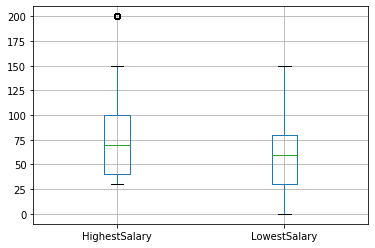

In [23]:
boxplot = baseDataFrame.boxplot(column=['HighestSalary', 'LowestSalary'])

In [24]:
baseDataFrame.groupby(['HighestSalary']).size()

HighestSalary
30     60455
40     22229
50     33127
60     26031
70     27399
80     27439
100    22697
120    25992
150    22947
200    24106
dtype: int64

In [25]:
baseDataFrame.groupby(['LowestSalary']).size()

LowestSalary
0      60455
30     22229
40     33127
50     26031
60     27399
70     27439
80     22697
100    25992
120    22947
150    24106
dtype: int64

In [26]:
#Get the total average salalry
print("Overal average wage: ", baseDataFrame['AverageSalary'].mean())

Overal average wage:  70.66624604167949


In [27]:
#Analysis the dates of the posting
print("Latest Posting is:", baseDataFrame["Date"].max())
print("Earlisest Posting is:", baseDataFrame["Date"].min())

Latest Posting is: 2019-03-13 00:00:00
Earlisest Posting is: 2018-10-01 00:00:00


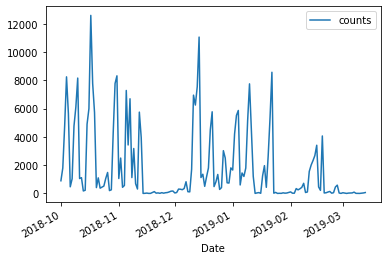

In [28]:
#Visualise jobs over time
dataFrame = baseDataFrame.dropna(subset=['Date'])
dataFrame = dataFrame.loc[0:, ['Date']]
dataFrame = dataFrame.value_counts().reset_index(name='counts')
dataFrame.set_index('Date').plot()

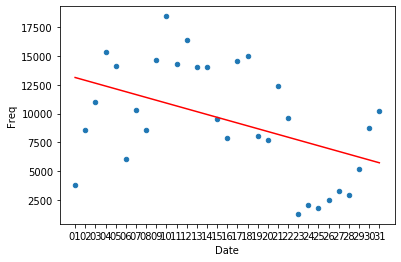

In [29]:
#Analysis postings by date
dataFrame =  baseDataFrame.dropna(subset=['Date'])
dataFrame['Date'] = dataFrame['Date'].dt.strftime('%d')
dataFrame = dataFrame.loc[0:, ['Date']].sort_values(by=['Date'])
dataFrame['Freq'] = dataFrame.groupby('Date')['Date'].transform('count')
dataFrame = dataFrame.drop_duplicates()
ax = dataFrame.plot.scatter(x='Date', y='Freq')

dates = []
for i in range(1,32):
    dates.insert(len(dates),i)    

d = np.polyfit(dates, dataFrame['Freq'],1)
f = np.poly1d(d)
dataFrame.insert(2,'Treg',f(dates))
dataFrame.plot(x='Date', y='Treg', color='Red', legend=False,ax=ax)

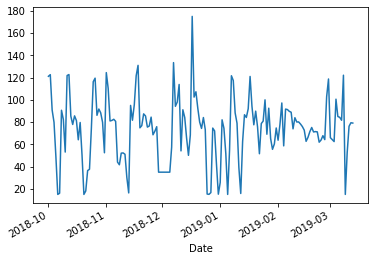

In [30]:
#Analysis the salary over time
dataFrame =  baseDataFrame.dropna(subset=['Date', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Date','AverageSalary']]
dataFrame.groupby(['Date'])['AverageSalary'].mean().plot()

In [31]:
#Analysis job titles
print("There is", len(baseDataFrame["Title"].unique()), "unique job titles")
print("at", len(baseDataFrame["Company"].unique()), "companies\n")
print("The top 10 job titles are: ")
value_bins = baseDataFrame["Title"].value_counts()
top_10_title = value_bins[0:10]
print(top_10_title, "\n")
print("The top 10 companies with the most jobs are: ")
value_bins = baseDataFrame["Company"].value_counts()
top_10_Company = value_bins[0:10]
print(top_10_Company, "\n")
print("The top 10 sectors are: ")
value_bins = baseDataFrame["Classification"].value_counts()
top_10_Classification = value_bins[0:10]
print(top_10_Classification, "\n")

There is 163258 unique job titles
at 40421 companies

The top 10 job titles are: 
Project Manager                 1061
Business Development Manager     772
Administration Assistant         707
Business Analyst                 704
Executive Assistant              646
Receptionist                     604
Registered Nurse                 566
Customer Service Officer         493
Administration Officer           477
Account Manager                  398
Name: Title, dtype: int64 

The top 10 companies with the most jobs are: 
None                            11719
Jora Local                       8689
Hudson                           1389
Design & Build                   1334
Robert Walters                   1247
Chandler Macleod Group           1185
Hays Accountancy & Finance       1106
Programmed Skilled Workforce     1048
Hays Trades & Labour             1012
Hays Office Support               971
Name: Company, dtype: int64 

The top 10 sectors are: 
None                                   

There are 5 job types
These are:  ['None' 'Full Time' 'Contract/Temp' 'Part Time' 'Casual/Vacation']
The amount of each are:
Full Time          186360
Contract/Temp       46636
Casual/Vacation     24060
Part Time           20664
None                14702
Name: JobType, dtype: int64


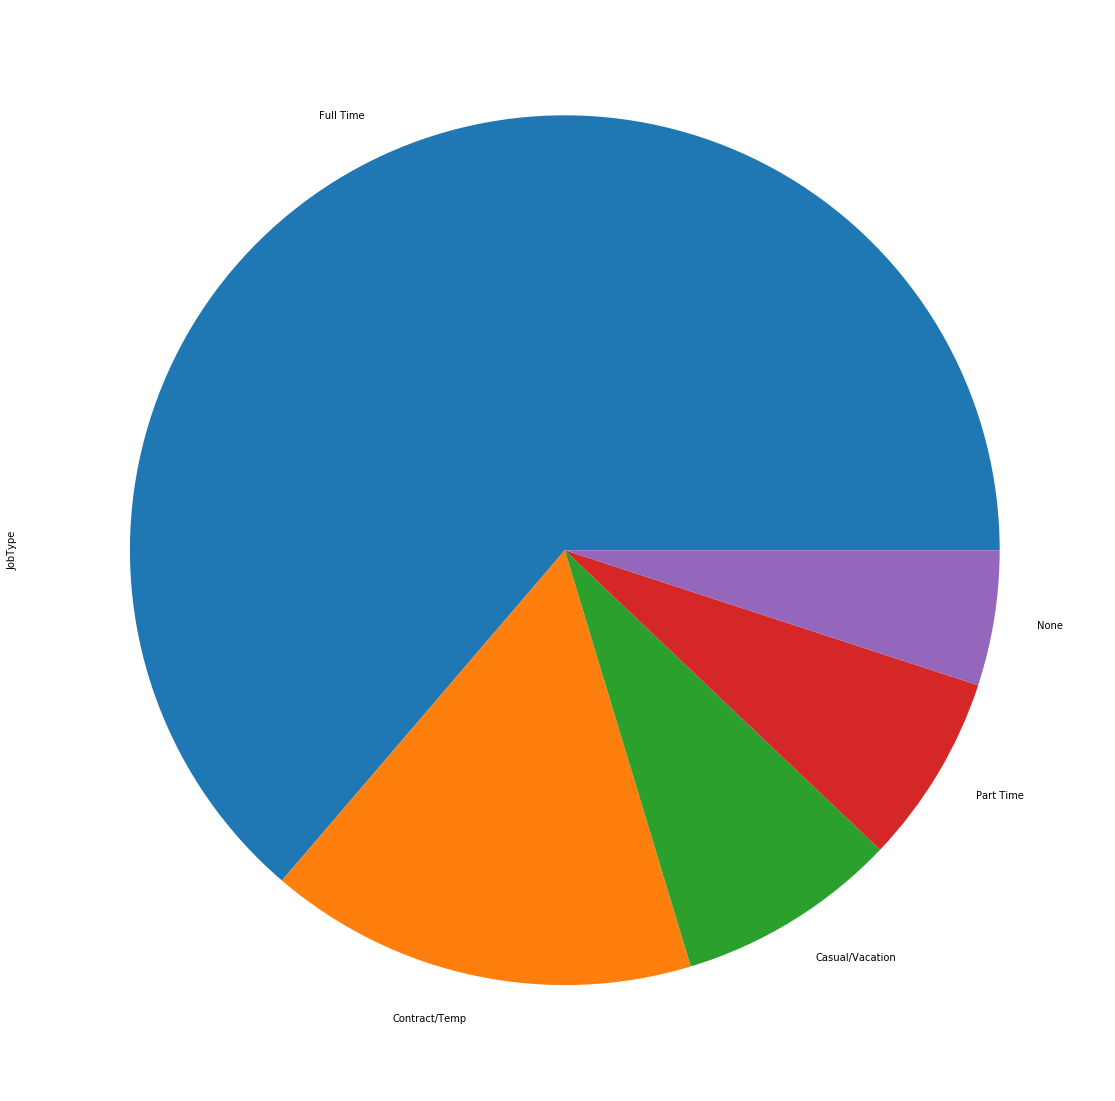

In [32]:
#Analysis job type
typeDataFrame =  baseDataFrame.dropna(subset=['JobType'])
print("There are", len(typeDataFrame['JobType'].unique()), "job types")
print("These are: ",typeDataFrame['JobType'].unique())
print("The amount of each are:")
print(typeDataFrame['JobType'].value_counts())

value_bins = typeDataFrame['JobType'].value_counts()
value_bins.plot.pie(y='JobType', figsize=(20, 20))

In [33]:
#Analysis the salary over time
dataFrame =  baseDataFrame.dropna(subset=['JobType', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['JobType','AverageSalary']]
dataFrame.groupby(['JobType'])['AverageSalary'].mean()

JobType
Casual/Vacation    46.844140
Contract/Temp      83.572133
Full Time          74.129695
None               56.727996
Part Time          47.957801
Name: AverageSalary, dtype: float64

### Market by Locations

In [34]:
#Find the common sector for each location
dataFrame =  baseDataFrame.dropna(subset=['Location', 'Classification'])
dataFrame =  dataFrame.loc[0:, ['Location','Classification']]
dataFrame = dataFrame.value_counts().reset_index(name='count')

dataFrame = dataFrame.groupby(['Location','Classification']).agg({'count':sum})

g = dataFrame['count'].groupby('Location', group_keys=False) 
largest = g.nlargest(1)
print(largest)


Location                              Classification                        
ACT                                   Information & Communication Technology      1470
Adelaide                              Trades & Services                            810
Adelaide Hills & Barossa              Hospitality & Tourism                         32
Albany & Great Southern               Healthcare & Medical                          20
Albury Area                           Healthcare & Medical                          85
Alice Springs & Central Australia     Healthcare & Medical                          53
Bairnsdale & Gippsland                Education & Training                          71
Ballarat & Central Highlands          Healthcare & Medical                         102
Bendigo, Goldfields & Macedon Ranges  Healthcare & Medical                         143
Blue Mountains & Central West         Trades & Services                            129
Brisbane                              Information & C

In [35]:
#order locations by amount of jobs
dataFrame =  baseDataFrame.loc[0:, ['Location']]
dataFrame['Counts'] = dataFrame.Location.groupby(dataFrame.Location).transform('count')
dataFrame = dataFrame.drop_duplicates(subset=['Location'])

In [36]:
#Sort locations by average salary
dataFrame =  baseDataFrame.dropna(subset=['Location', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Location','AverageSalary']]
for index, row in dataFrame.groupby('Location', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['Location'], "average wage: " ,row['AverageSalary'])

Port Hedland, Karratha & Pilbara average wage:  86.58902361199745
Kalgoorlie, Goldfields & Esperance average wage:  85.86492890995261
ACT average wage:  83.81489007943838
Geraldton, Gascoyne & Midwest average wage:  80.03125
Coober Pedy & Outback SA average wage:  80.0
Mackay & Coalfields average wage:  76.9571865443425
Far West & North Central NSW average wage:  76.39784946236558
Sydney average wage:  75.56997236280105
Gladstone & Central QLD average wage:  73.93695014662757
Darwin average wage:  73.50627615062761
Western QLD average wage:  72.89144050104385
Perth average wage:  72.35072533461569
Dubbo & Central NSW average wage:  71.76567656765677
None average wage:  71.40547114702441
Port Macquarie & Mid North Coast average wage:  71.15654205607477
Broome & Kimberley average wage:  71.01503759398496
Brisbane average wage:  69.50004979583707
Rockhampton & Capricorn Coast average wage:  69.33866279069767
Melbourne average wage:  69.20691711389385
Tumut, Snowy & Monaro average wage:  6

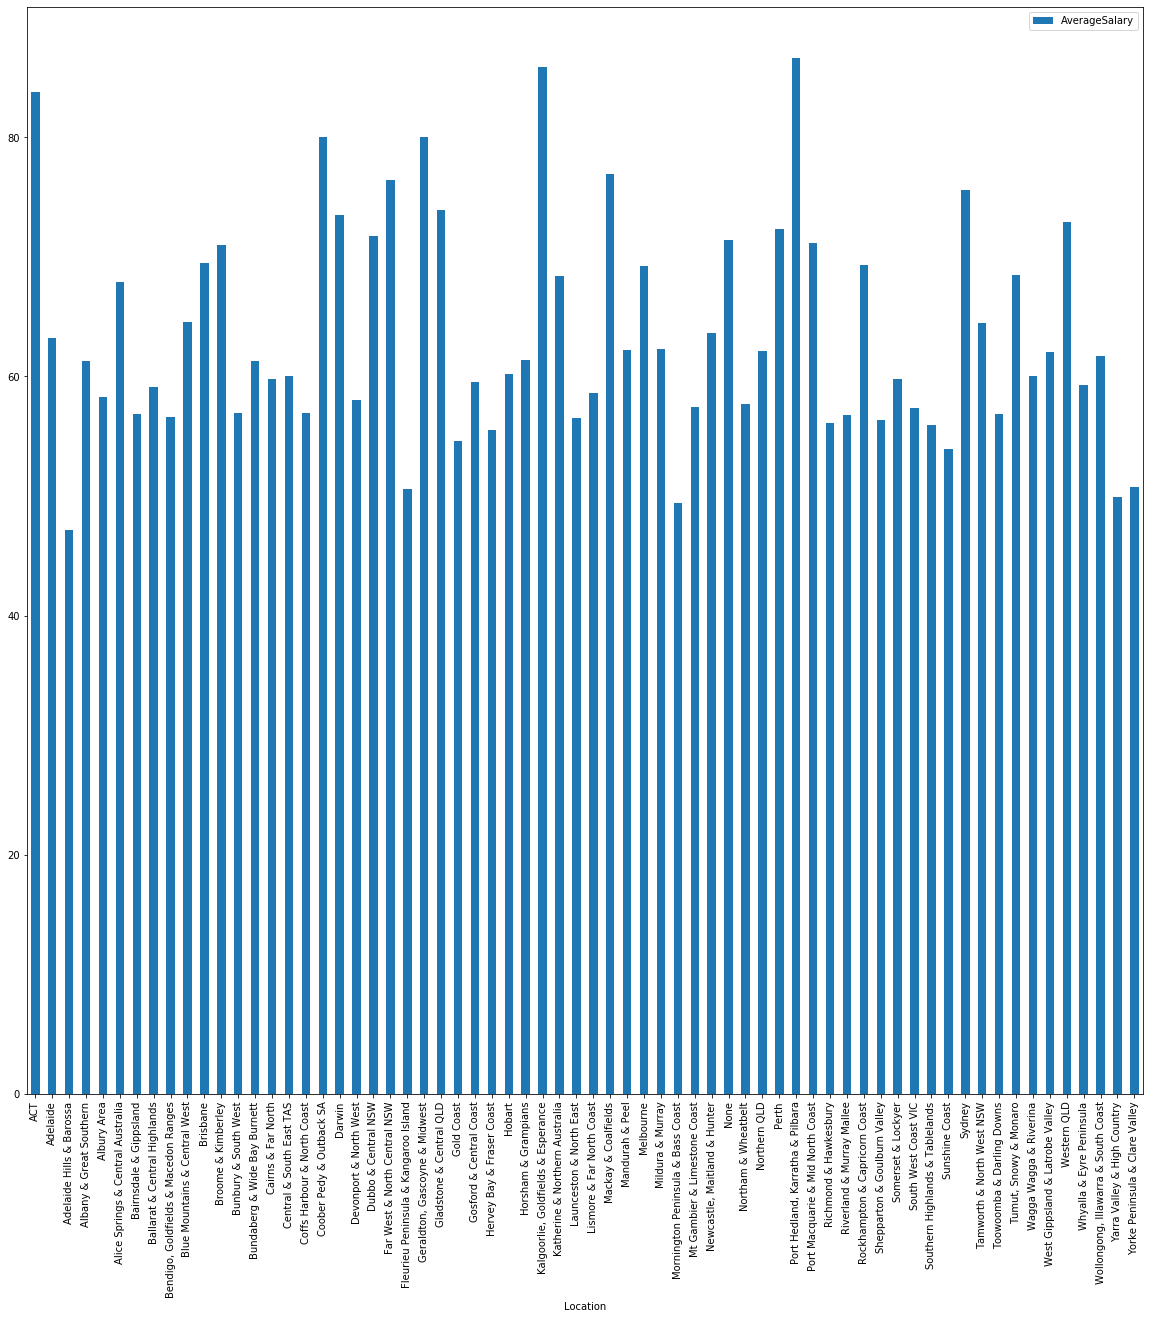

In [37]:
dataFrame =  baseDataFrame.dropna(subset=['Location', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Location','AverageSalary']]
dataFrame.groupby('Location', as_index=False)['AverageSalary'].mean().plot.bar(x='Location', y='AverageSalary', rot=90, figsize=(20,20))

### Market by Sectors

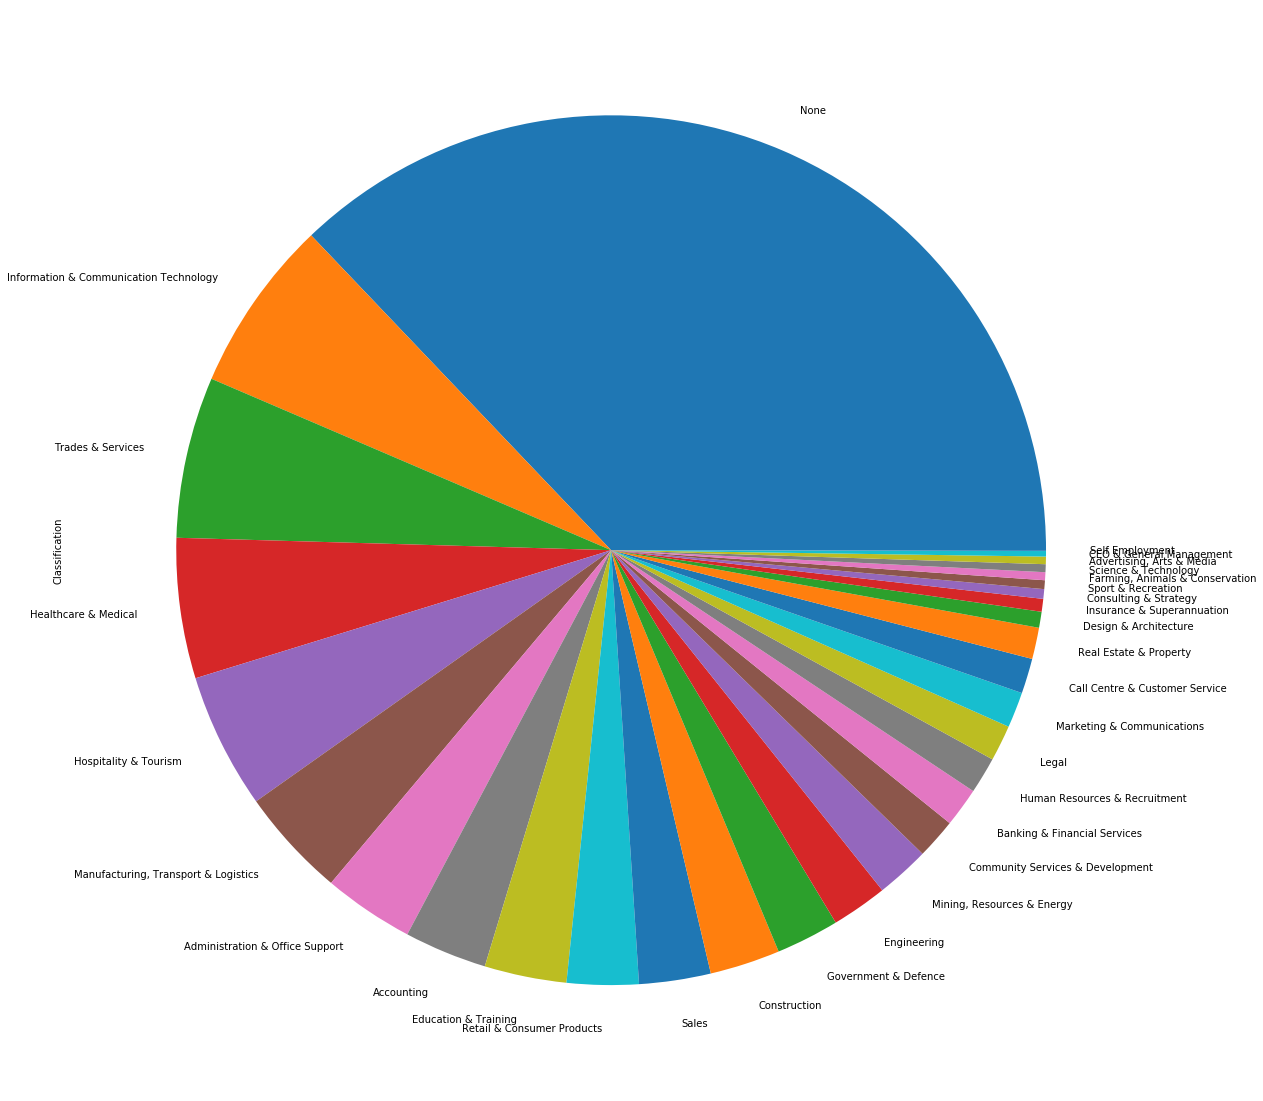

In [38]:
#Get share of the market by sectorss
dataFrame = baseDataFrame.dropna(subset=['Classification'])
dataFrame = dataFrame.loc[0:, ['Classification']]
value_bins = dataFrame["Classification"].value_counts()
value_bins.plot.pie(y='Classification', figsize=(20, 20))

In [39]:
#Find the Highest paying sector
dataFrame = baseDataFrame.dropna(subset=['Classification', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Classification','AverageSalary']]
for index, row in dataFrame.groupby('Classification', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['Classification'], "average wage: " ,row['AverageSalary'])

CEO & General Management average wage:  113.92074198988196
Information & Communication Technology average wage:  107.57157274127583
Consulting & Strategy average wage:  104.03333333333333
Mining, Resources & Energy average wage:  99.65950128976785
Engineering average wage:  98.47998022738507
Construction average wage:  95.8138012308498
Legal average wage:  93.39395491803279
Banking & Financial Services average wage:  82.9131455399061
Government & Defence average wage:  81.24215900802334
Science & Technology average wage:  80.51341890315052
Self Employment average wage:  80.21978021978022
Human Resources & Recruitment average wage:  77.69027217741936
Marketing & Communications average wage:  76.19158275238833
Insurance & Superannuation average wage:  75.6038820992092
Accounting average wage:  73.65969052655015
Design & Architecture average wage:  73.10017271157167
None average wage:  71.40547114702441
Sales average wage:  70.3715130479496
Healthcare & Medical average wage:  70.151216952

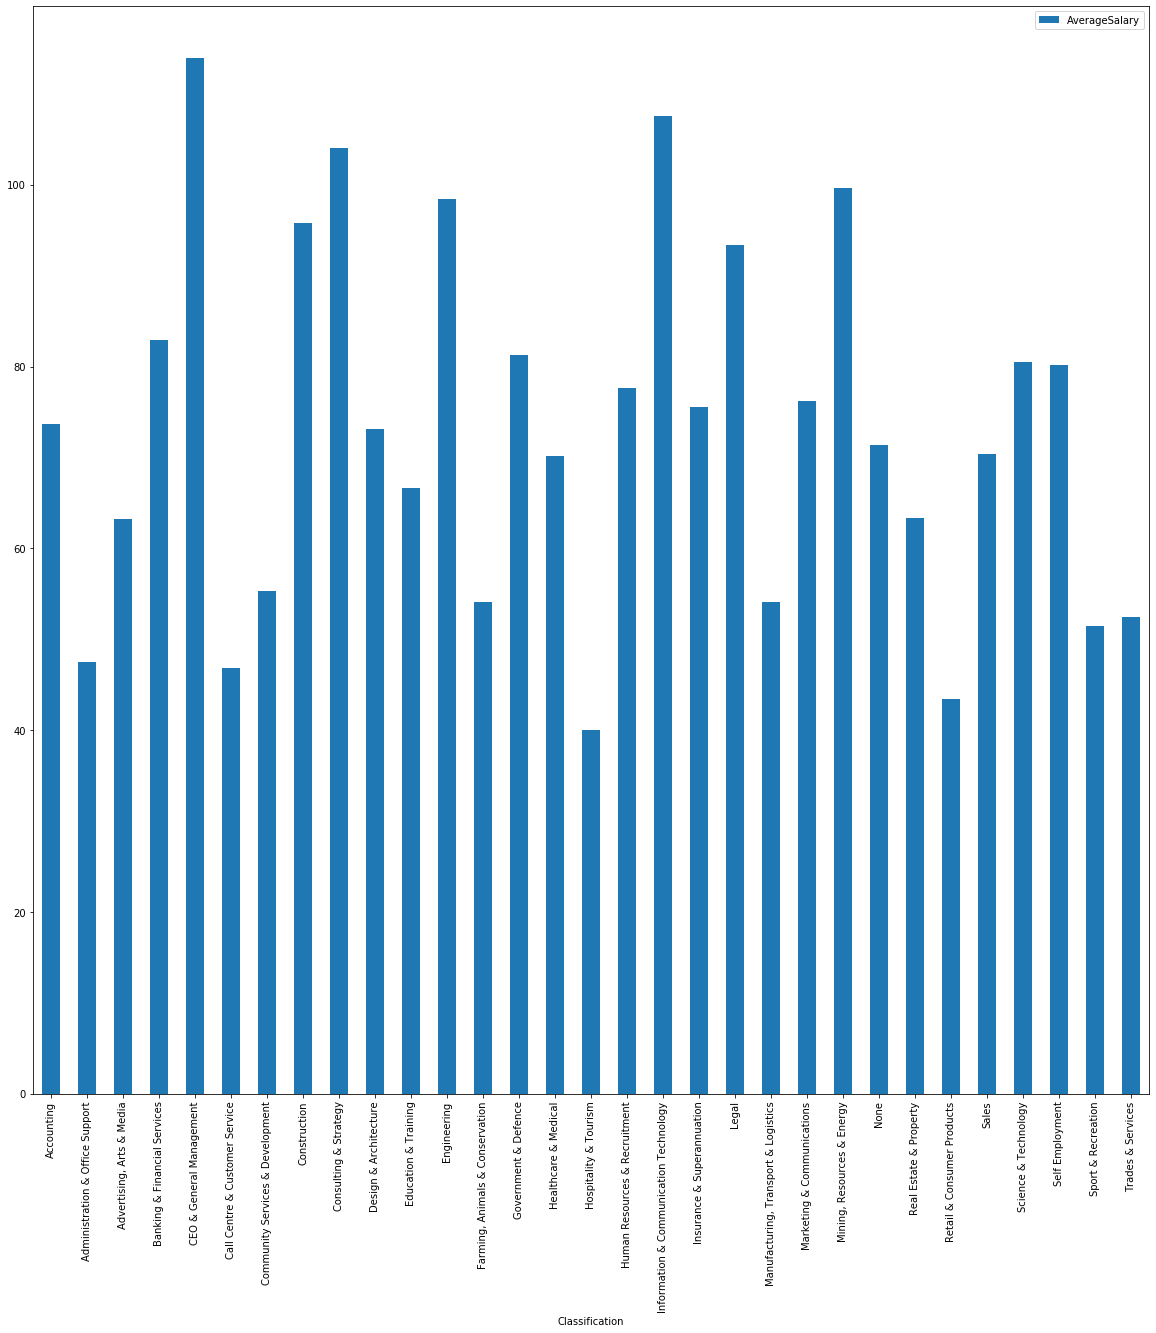

In [40]:
#Compare average salary for each sector
dataFrame.groupby('Classification', as_index=False)['AverageSalary'].mean().plot.bar(x='Classification', y='AverageSalary', rot=90, figsize=(20,20))

In [41]:
#Find the highest paying subclassification in each classification
dataFrame =  baseDataFrame.dropna(subset=['Classification', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Classification','SubClassification','AverageSalary']]

dataFrame = dataFrame.groupby(['Classification','SubClassification']).mean()

g = dataFrame['AverageSalary'].groupby('Classification', group_keys=False) 
largest = g.nlargest(1)
print(largest)

Classification                          SubClassification                             
Accounting                              Company Secretaries                               133.928571
Administration & Office Support         Contracts Administration                           62.396552
Advertising, Arts & Media               Management                                        108.717949
Banking & Financial Services            Corporate Finance & Investment Banking            118.387097
CEO & General Management                CEO                                               124.898990
Call Centre & Customer Service          Management & Support                               73.029046
Community Services & Development        Management                                         88.268293
Construction                            Project Management                                117.360024
Consulting & Strategy                   Management & Change Consulting                    117.491039
Desi

In [42]:
#Find the Highest paying subsector
dataFrame = baseDataFrame.dropna(subset=['SubClassification', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['SubClassification','AverageSalary']]
for index, row in dataFrame.groupby('SubClassification', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['SubClassification'], "average wage: " ,row['AverageSalary'])

Company Secretaries average wage:  133.92857142857142
Oil & Gas - Exploration & Geoscience average wage:  127.17391304347827
Architects average wage:  125.79960513326752
Team Leaders average wage:  125.74534161490683
CEO average wage:  124.8989898989899
Generalists - In-house average wage:  124.01315789473684
Materials Handling Engineering average wage:  121.95652173913044
Mathematics, Statistics & Information Sciences average wage:  120.22727272727273
Risk Consulting average wage:  119.44444444444444
Security average wage:  119.09516380655226
Programme & Project Management average wage:  119.08508158508158
Financial Managers & Controllers average wage:  118.77444589308996
Corporate Finance & Investment Banking average wage:  118.38709677419355
Management & Change Consulting average wage:  117.4910394265233
Project Management average wage:  117.1207729468599
General/Business Unit Manager average wage:  116.82305630026809
COO & MD average wage:  115.74074074074075
Banking & Finance Law 

### Interactive Web Page

In [43]:
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import output_notebook
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.models.widgets import Select
from bokeh.models.widgets import Select
from bokeh.layouts import column, row
from bokeh.io import curdoc
from bokeh.models.callbacks import CustomJS
from bokeh.models.ranges import FactorRange

import yaml
output_notebook()

Loading BokehJS ...

In [44]:
#Interactive graph of job types
#Analysis job type
typeDataFrame =  baseDataFrame.dropna(subset=['JobType'])
value_bins = typeDataFrame['JobType'].value_counts()

data = pd.Series(value_bins).reset_index(name='value').rename(columns={'index':'JobType'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(value_bins)]

p = figure(plot_height=350, title="Total Job Types", toolbar_location=None,
           tools="hover", tooltips="@JobType: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='JobType', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [45]:
d1 = {'time': [1,2,3,4], 'y': [2,1,1,8]}
d2 = {'time': [1,2,3,4,5], 'y': [2,1,1,8,22]}


source = ColumnDataSource(d1 )

print(source.data)


p = figure()
r = p.vbar(x='time', top='y', width=1,
         source = source)

    
callback = CustomJS(args=dict(source=source, d1=d1,d2=d2), code="""
   if (cb_obj.value=="d1"){
        source.data = d1 
   }
   if (cb_obj.value=="d2"){
        source.data = d2
   }
   source.change.emit();
""")

select = Select(title="monthly csv-s",  options=['d1', 'd2'])
select.js_on_change('value', callback)

layout = column(row(select, width=400), p)
curdoc().add_root(layout)

show(layout)

{'time': [1, 2, 3, 4], 'y': [2, 1, 1, 8]}


In [46]:
locationFrame = baseDataFrame.loc[0:, ['Location']]
locationFrame = locationFrame.value_counts().reset_index(name='Count')
locationFrame = locationFrame.rename(columns={"Location": "Type"}) 
locationFrame = locationFrame.head(10)


sectorsFrame = baseDataFrame.loc[0:, ['Classification']]
sectorsFrame = sectorsFrame.value_counts().reset_index(name='Count')
sectorsFrame = sectorsFrame.rename(columns={"Classification": "Type"}) 
sectorsFrame = sectorsFrame.head(10)

locationFrameDict = {}
typeArr = []
countArr = []
for index, rowV in locationFrame.iterrows():
    typeArr.insert(0, rowV['Type'])
    countArr.insert(0, rowV['Count'])
    
locationFrameDict['Type'] = typeArr
locationFrameDict['Count'] = countArr


sectorsFrameDict = {}
typeArr = []
countArr = []
for index, rowV in sectorsFrame.iterrows():
    typeArr.insert(0, rowV['Type'])
    countArr.insert(0, rowV['Count'])
    
sectorsFrameDict['Type'] = typeArr
sectorsFrameDict['Count'] = countArr
    

source = ColumnDataSource(locationFrameDict)
p = figure(x_range=locationFrameDict['Type'])
p.xaxis.major_label_orientation = pi/2


r = p.vbar(x='Type', top='Count', width=1,
         source = source)

    
callback = CustomJS(args=dict(p=p,source=source, locationFrameDict=locationFrameDict,sectorsFrameDict=sectorsFrameDict), code="""
   if (cb_obj.value=="Location"){
        source.data = locationFrameDict
        p.x_range.factors = locationFrameDict['Type'];
   }
   if (cb_obj.value=="Sector"){
        source.data = sectorsFrameDict
        p.x_range.factors = sectorsFrameDict['Type'];
   }
""")


select = Select(title="Total number of jobs",  options=['Location', 'Sector'])
select.js_on_change('value', callback)

layout = column(row(select, width=400), p)
curdoc().add_root(layout)

show(layout)

In [56]:
import os
df_dict = {}
dict_dict = {}
for filename in os.listdir("SkillsbyClassification"):
    item = pickle.load("SkillsbyClassification/" + filename)
    df = pd.DataFrame(data=item[1]).head(10)
    df_dict[item[0]] = df
    
    typeArr = []
    countArr = []
    for index, rowV in df.iterrows():
        typeArr.insert(0, rowV['Words'])
        countArr.insert(0, rowV['Frequency'])
    dict_dict[item[0]] = {}
    dict_dict[item[0]]["Words"] = typeArr
    dict_dict[item[0]]['Frequency'] = countArr

source = ColumnDataSource(df_dict["Accounting"])
p = figure(x_range=dict_dict["Accounting"]["Words"])


r = p.vbar(x='Words', top='Frequency', width=1, source = source)

    
callback = CustomJS(args=dict(p=p, source=source, dict_dict=dict_dict), code="""
   source.data = dict_dict[cb_obj.value]
   p.x_range.factors = dict_dict[cb_obj.value]["Words"];
   source.change.emit();
""")

select = Select(title="Total number of jobs",  options=list(df_dict.keys()))
select.js_on_change('value', callback)

layout = column(row(select, width=1000), p)
curdoc().add_root(layout)

show(layout)

In [48]:
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql.functions import udf
from pyspark.ml.feature import Tokenizer, StopWordsRemover, Word2VecModel
from pyspark.sql.types import *
from sklearn.metrics.pairwise import cosine_similarity as cosine
from nltk.stem.porter import *

os.environ["PYSPARK_PYTHON"] = os.environ["HOMEDRIVE"]+os.environ["HOMEPATH"]+"\\anaconda3\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"] = os.environ["HOMEDRIVE"]+os.environ["HOMEPATH"]+"\\anaconda3\python.exe"
os.environ["PYSPARK_PYTHON"]

'C:\\Users\\William\\anaconda3\\python.exe'

In [ ]:
conf=SparkConf()
conf.set("spark.driver.memory", "10g")
conf.set("spark.cores.max", "4")
conf.set("spark.executor.heartbeatInterval", "3600")

sc = SparkContext.getOrCreate(conf)

spark = SQLContext(sc)

In [ ]:
tokenizer = Tokenizer(inputCol="FullDescription", outputCol="words")

In [ ]:
remover = StopWordsRemover(inputCol="words", outputCol="noStops")
stopwords = remover.getStopWords()
stopwords[:10]

In [ ]:
stemmer = PorterStemmer()

def stem(word_list):
    output_word_list = []
    for word in word_list:
        word_stem = stemmer.stem(word)
        if len(word_stem) > 2:
            output_word_list.append(word_stem)
    return output_word_list

stemmer_udf = udf(lambda word: stem(word), ArrayType(StringType()))

In [ ]:
vectors = pickle.load("vectors.lz4")
new_model = Word2VecModel.load("vec.model")

In [ ]:
cv = [("""
Experience in management
Law
Client Relations
Teamwork
""".replace("\n", " "),)]
schema = StructType([StructField("FullDescription", StringType(), True)])
df = spark.createDataFrame(data=cv, schema=schema)

In [ ]:
df = tokenizer.transform(df)
df = remover.transform(df)
df = df.withColumn("stemmedNoStops", stemmer_udf("noStops"))
df = new_model.transform(df)
cv_vec = df.rdd.map(lambda row: row['vecs'].toArray()).reduce(lambda x,y: x+y)

In [ ]:
sim = []
for vec in vectors:
    sim.append((vec[0], cosine(vec[1].reshape(1, -1), cv_vec.reshape(1, -1))))

sim.sort(key=lambda x: x[1], reverse=True)
for sector in sim:
    print(f"{sector[0]}: {sector[1]}")